In [1]:
# Evaluation Projects
# Name : Sayyed Mudassar Iqbal Shakil Ahmed
# Batch : DSG2404
# Subject : Global Power Plant Project 2 Solution

### Importing Libraries For Regression and Classification in Advance.

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [9]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Mudassar\FlipRobo Internship\Evaluation Projects\Project 2\global_Power_plant_database.csv")

In [10]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reviewing the first and last 5 rows of the dataset reveals that it consists of 908 rows and 25 columns in total.

Our task is to predict two labels: `primary_fuel` and `capacity_mw`. Upon examining the `primary_fuel` column, we observe that it contains categorical data, which means predicting this label will involve a classification problem.

On the other hand, the `capacity_mw` column contains continuous data, so predicting this label will involve a regression problem.

My approach will be to analyze the entire dataset first and then process the information accordingly to separate the inputs for the Classification and Regression models.

# EDA

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [13]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In the previous cell, it's evident that many columns contain missing values, with some having all 908 rows completely empty. These columns will need to be removed as they provide no useful insights.

The columns with more than 50% missing data (i.e., more than 454 rows) that should be deleted are:

other_fuel1
other_fuel2
other_fuel3
owner
wepp_id
generation_gwh_2013
generation_gwh_2014
generation_gwh_2015
generation_gwh_2016
generation_gwh_2017
generation_data_source
estimated_generation_gwh

In [14]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

i HAVE CHOSEN TO DELETE ALL THE MORE THAN 50% MISSING DATA COLUMNS SO AS TO AVOID BIASNESS IN THE MODEL

In [16]:
df.shape

(908, 13)

In [17]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
commissioning_year,73
source,191


Upon examining the columns "country" and "country_long," we notice that both contain only a single unique value across all 908 rows, offering no valuable insight. Therefore, these columns can be removed.

Similarly, the "year_of_capacity_data" column also contains a single repeated value across its rows, along with some missing data, making it uninformative and suitable for deletion.

Additionally, the "name" and "gppd_idnr" columns contain entirely unique values in all 908 rows, serving as unique identifiers. Since these columns do not contribute to building a machine learning model, they can be removed as well.

Lastly, the "url" column, which holds web document links, doesn’t contribute to the machine learning process, so it will also be deleted.

To summarize, the columns that will be removed are:

country
country_long
year_of_capacity_data
name
gppd_idnr
url

In [18]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

In [19]:
print(df.shape)
df.head()

(908, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [20]:
df.isna().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

We still have missing values in some columns of our dataset that need to be addressed. Before proceeding, we'll separate the categorical columns from the numerical columns to simplify the application of mean and mode for handling these missing values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         908 non-null    float64
 1   latitude            862 non-null    float64
 2   longitude           862 non-null    float64
 3   primary_fuel        908 non-null    object 
 4   commissioning_year  528 non-null    float64
 5   source              908 non-null    object 
 6   geolocation_source  889 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.8+ KB


By using the info method, we observe that our filtered dataset contains 7 columns, out of which 4 have numerical data and 3 have object (categorical) data.

In [22]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


We have successfully separated the column names into object (categorical) and float (numerical) data types. Since outliers and skewness are not concerns for categorical columns, we can focus our preprocessing efforts specifically on the continuous numerical columns.

In [23]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

To address the missing data, I have decided to fill the null values in the continuous data columns with their respective mean values, while the null values in the categorical data columns will be filled using their mode.

In [24]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

mISSING VALUES TAKEN CARE

In [25]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

primary_fuel
primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64
source
source
Central Electricity Authority                                  520
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Reliance Power Ltd                                               4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Jaypee Ltd jccl)                                                 3
Hindustan Zinc ltd                                               3
PEDA      

# Data Visualization

In [26]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

Here are the names of all the columns in our filtered DataFrame. We will analyze each of these columns using various visual plots.

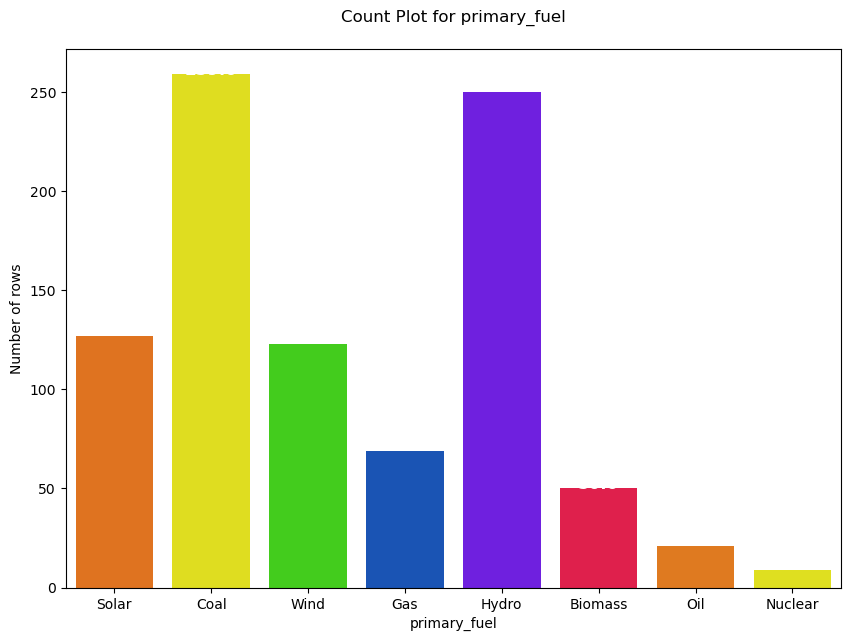

In [28]:

try:
    plt.figure(figsize=(10, 7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    
    ax = sns.countplot(x=col_name, data=df, palette="prism")

    # Adding counts on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    color='white', 
                    fontsize=12, 
                    fontweight='bold')

    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel("Number of rows")
    plt.show()

except Exception as e:
    print(f"Error: {e}")


In the count plot for the "primary_fuel" column above, we observe that coal and hydro fuel types have the highest representation, followed by solar and wind. In contrast, gas, biomass, oil, and nuclear have significantly lower data counts.

When considering "primary_fuel" as our target label, this creates a class imbalance issue for our classification model, which will need to be addressed appropriately.

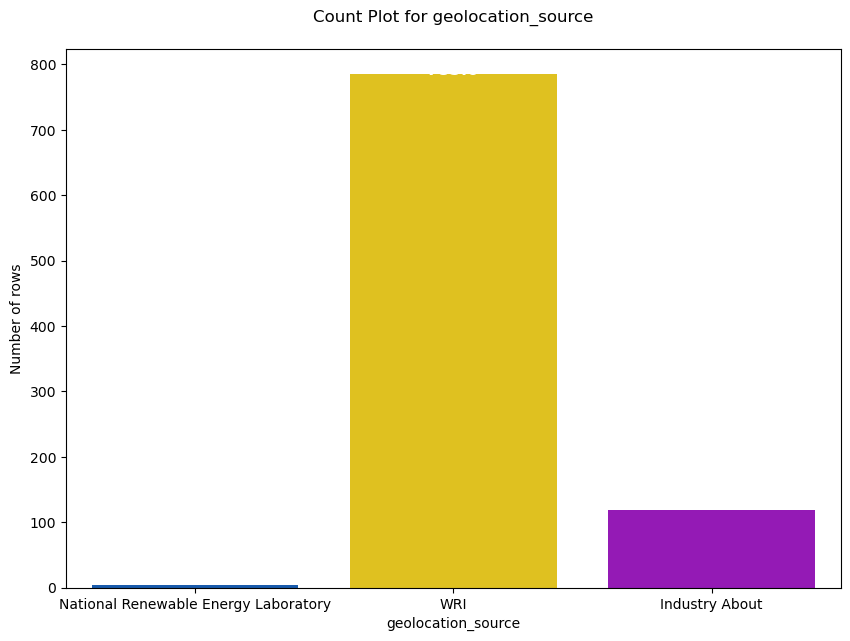

In [30]:

try:
    plt.figure(figsize=(10, 7))
    col_name = 'geolocation_source'
    
    # Create the count plot
    ax = sns.countplot(x=col_name, data=df, palette="prism")

    # Adding counts on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    color='white', 
                    fontsize=12, 
                    fontweight='bold')

    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel("Number of rows")
    plt.show()

except Exception as e:
    print(f"Error: {e}")


In the count plot for the "geolocation_source" column above, we observe that the majority of the data is attributed to the WRI option, while the National Renewable Energy Laboratory has a minimal representation that appears almost negligible.

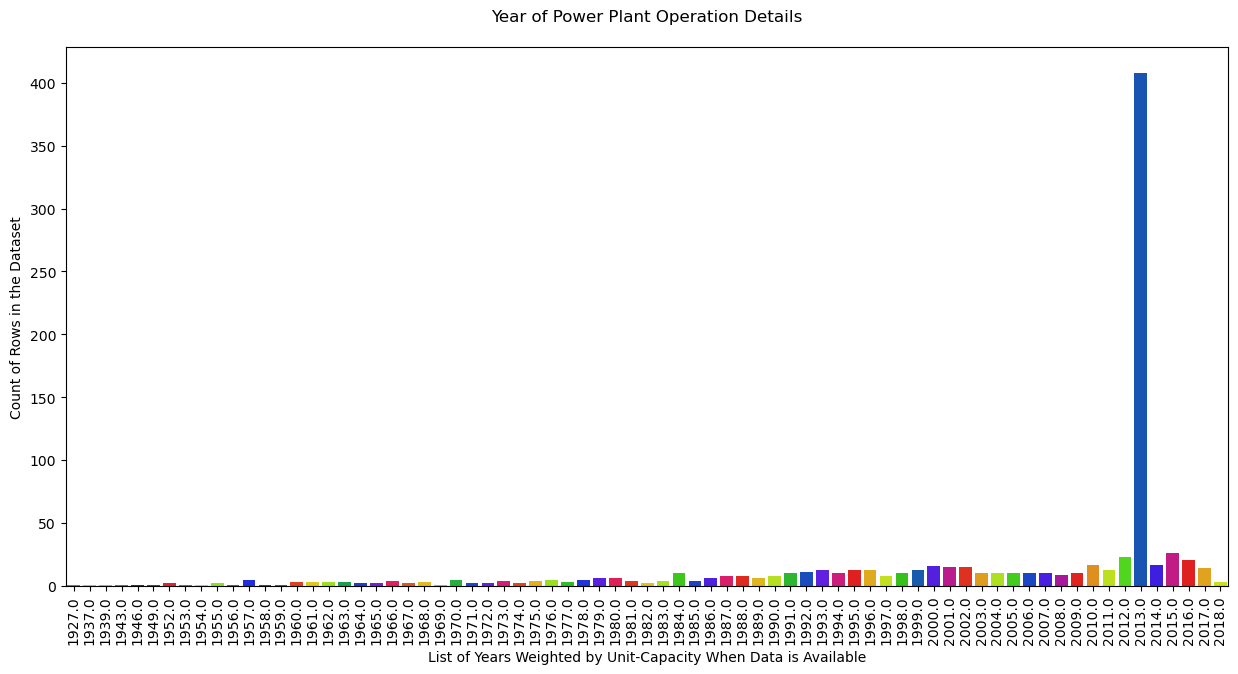

In [32]:
try:
    plt.figure(figsize=(15, 7))
    
    # Generate the count plot
    diag = sns.countplot(x='commissioning_year', data=df, palette="prism")
    
    # Rotate x-tick labels
    diag.set_xticklabels(diag.get_xticklabels(), rotation=90)
    
    plt.title("Year of Power Plant Operation Details\n")
    plt.xlabel("List of Years Weighted by Unit-Capacity When Data is Available")
    plt.ylabel("Count of Rows in the Dataset")
    plt.show()

except Exception as e:
    print(f"Error: {e}")


The count plot above displays the years when the power plant data became available. Given that there were missing values in the "commissioning_year" column, we replaced those with the mode, which is the year 1954, as it accounts for the highest number of rows in our dataset compared to the other years.

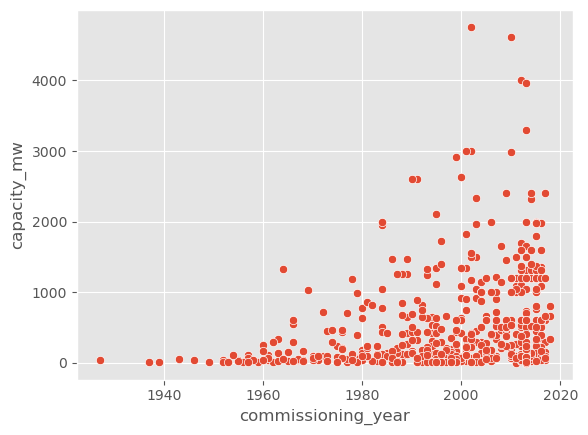

In [33]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

The scatter plot above illustrates that electricity generation capacity, measured in megawatts, was relatively low in earlier years compared to more recent times. This increase can be attributed to the development of more efficient fuel types used for power generation.

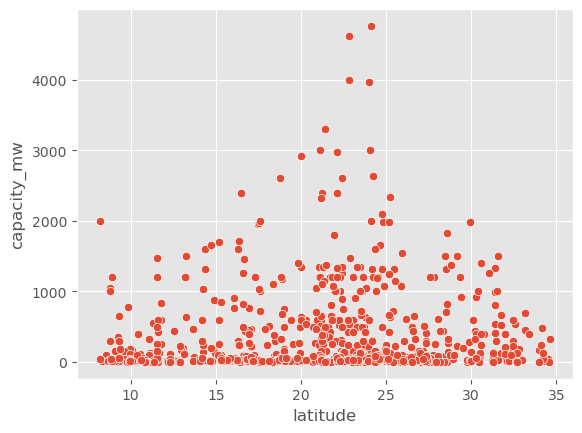

In [34]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

The scatter plot above indicates that the latitude for electricity generation peaks in terms of megawatt capacity between 20 and 25 decimal degrees.

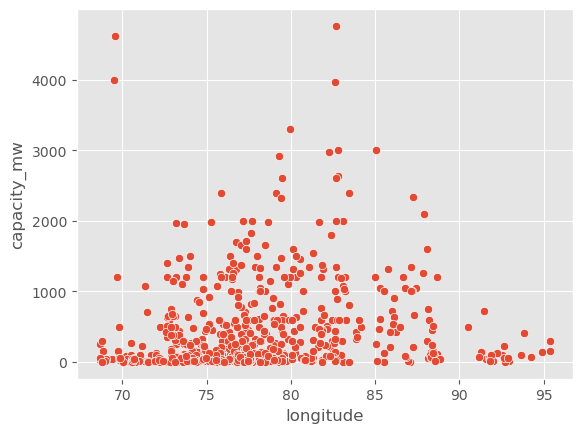

In [35]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

The scatter plot above shows that the longitude for electricity generation reaches its highest megawatt capacity around 70 degrees, with another peak occurring between 80 and 85 degrees.

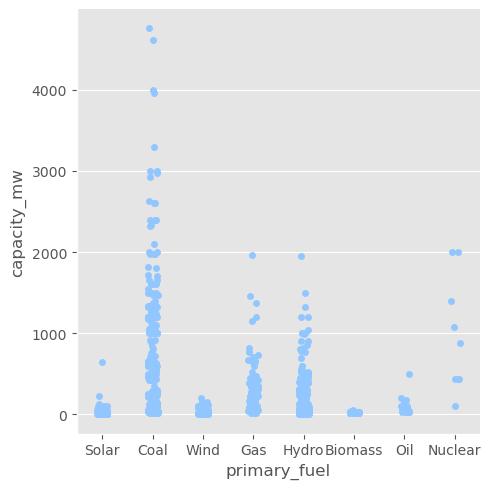

In [36]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

In the above categorical plot we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

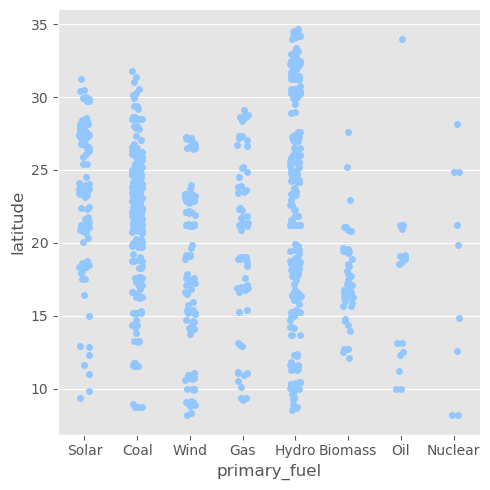

In [37]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.

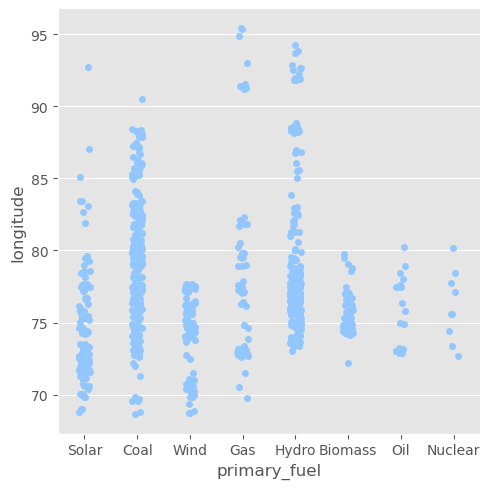

In [38]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

The categorical plot above illustrates that there is a notable distribution of fuel types along longitude. Landlocked areas tend to rely on coal for electricity generation, while coastal regions primarily utilize hydro fuel. Additionally, solar and wind energy sources are represented, albeit to a lesser extent, across the longitude values.

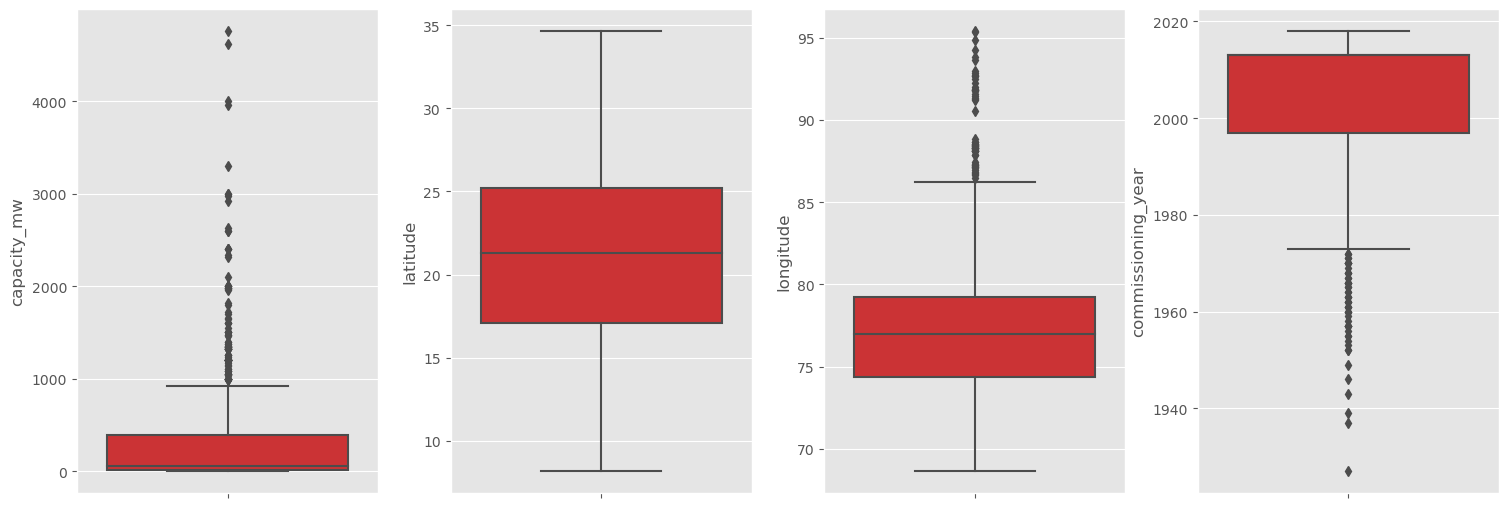

In [39]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In the above box plot we can see presence of outliers in our numerical columns that will need to be checked before we start building any machine learning model.

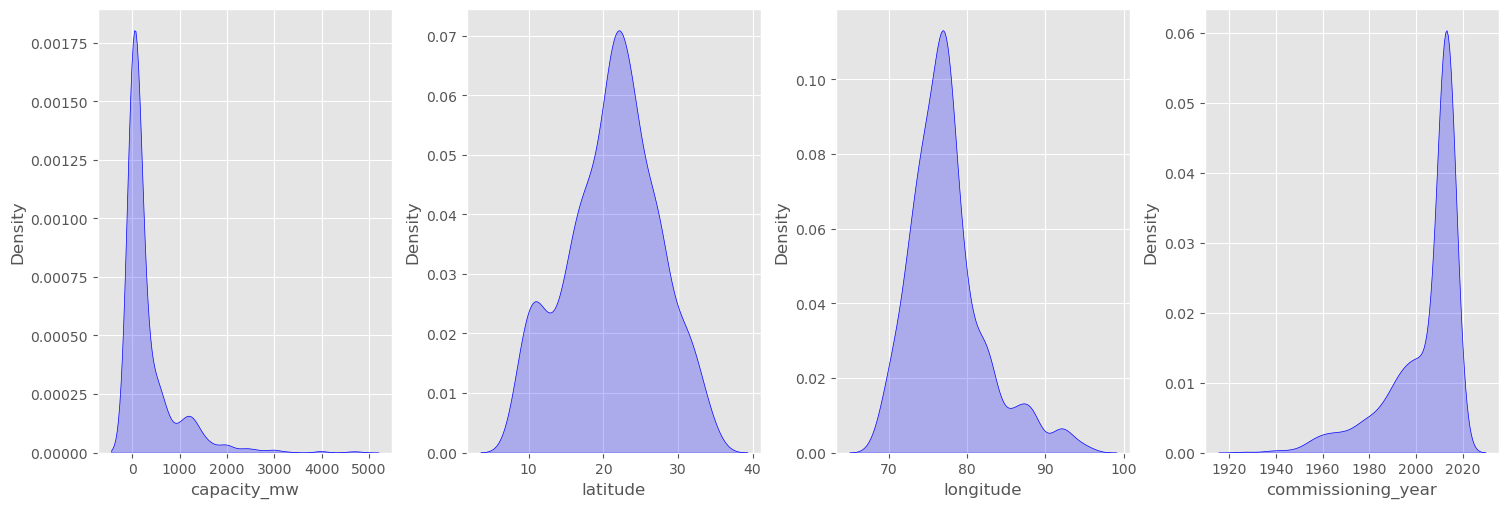

In [40]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

The distribution plot above reveals skewness in our numerical data columns, which will need to be addressed before we can proceed with the model-building process.

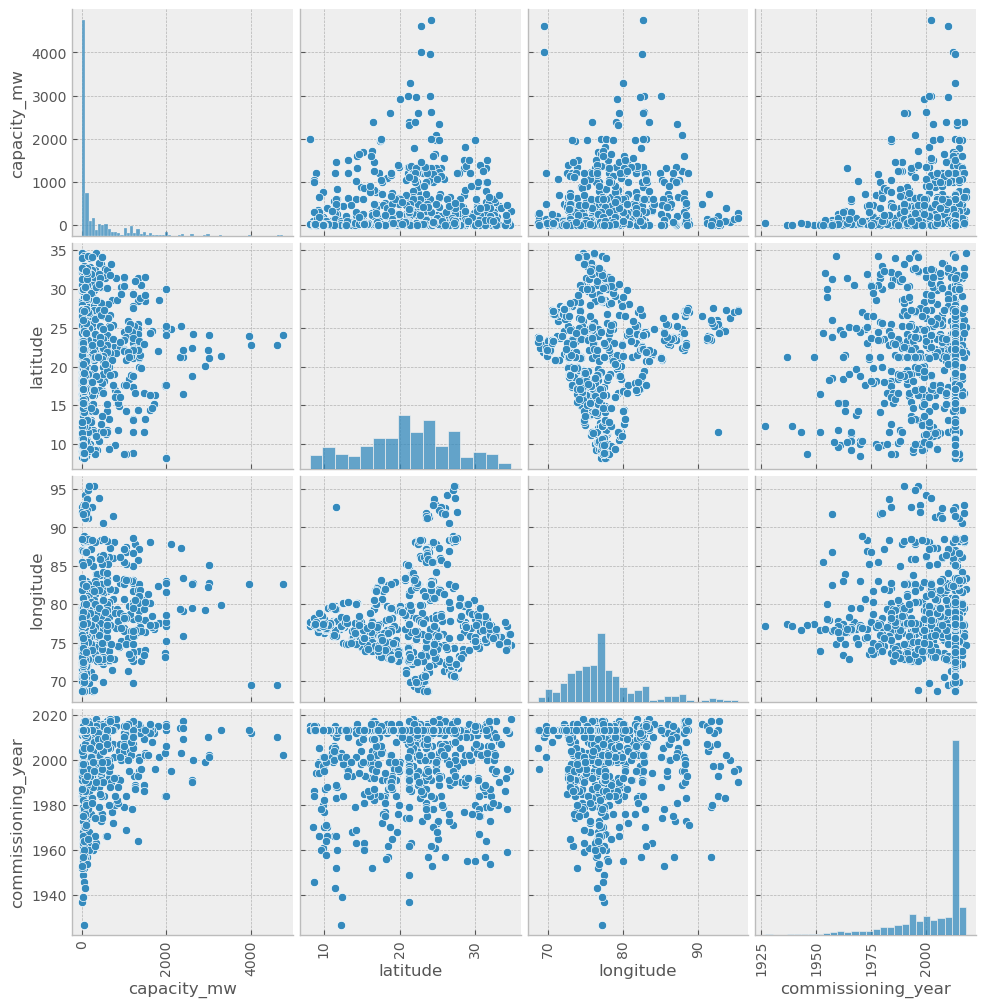

In [41]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

From the above pair plot we can see the data distribution amongst the numerical data type columns

### Encoding all the object datatype columns

In [42]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


I am applying Label Encoding to our target column "primary_fuel" to convert the labels from object data type to numerical data type.



In [43]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


I am using the Ordinal Encoder to convert all categorical feature columns from object data type to numerical data type. Although I could have used one-hot encoding, the "source" column contains many unique values, which would significantly increase the number of resulting columns. Therefore, I believe Ordinal Encoding is the more suitable choice in this case.



### Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

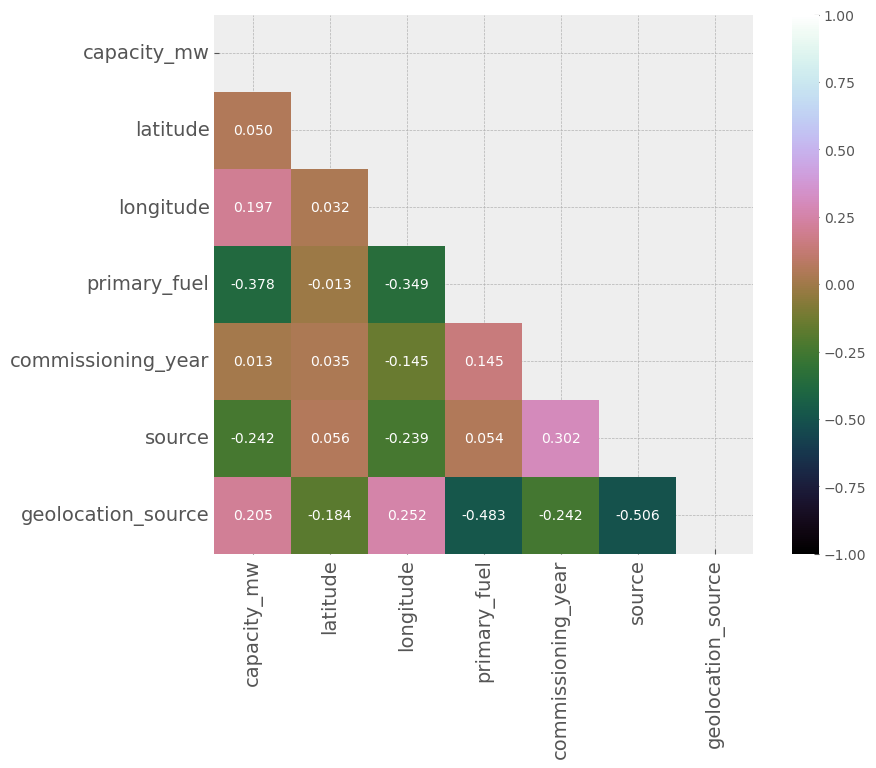

In [44]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The heatmap above shows that our target labels, "capacity_mw" and "primary_fuel," exhibit both positive and negative correlations with the other feature columns. Additionally, there is minimal multicollinearity present, so we do not need to be concerned about it. The features that display significant correlations are interdependent, and I plan to retain them in the dataset.

### Correlation Bar Plot comparing features with our labels

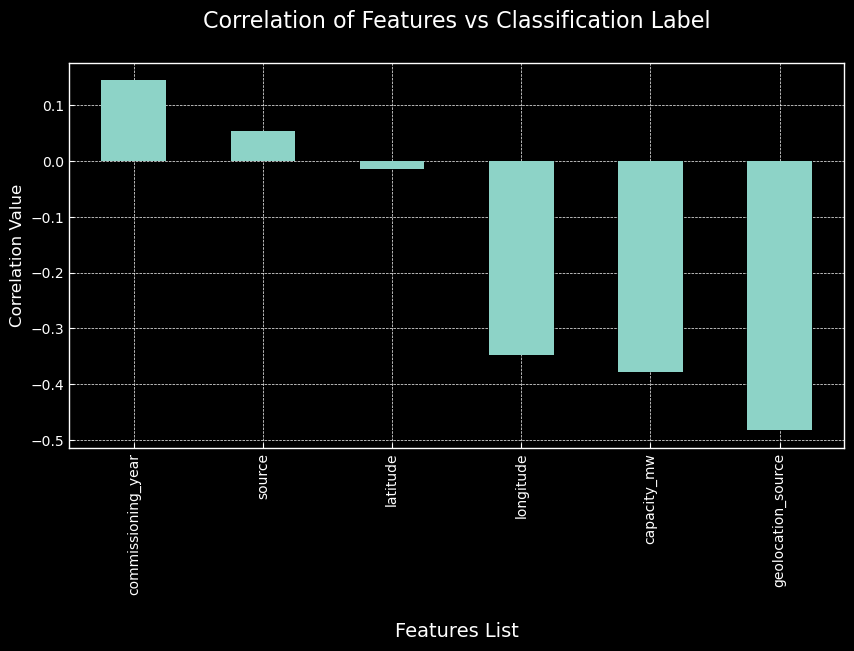

In [45]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When analyzing our classification label "primary_fuel," we find that among the remaining feature columns, 2 exhibit positive correlation, while 4 show negative correlation.

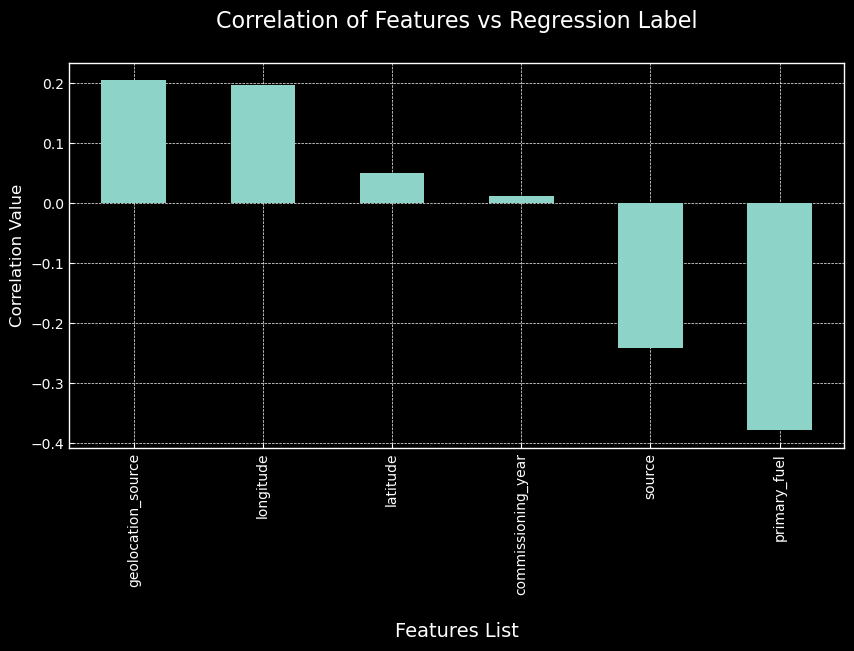

In [46]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.

### Z Score to remove outliers

In [47]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 7)
Shape of the dataframe after removing outliers:  (839, 7)
Percentage of data loss post outlier removal:  7.599118942731277


I have employed the Z-score method to eliminate outliers, as the IQR method was causing me to lose significantly more than 10% of the data, which was not acceptable.

### Skewness

In [48]:
df.skew()

capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -1.578180
source                1.794155
geolocation_source   -2.114267
dtype: float64

Using Log Transform to fix skewness

In [49]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

#### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [50]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

I have separated the dataset into features and the classification label, where 
𝑋
X represents all the feature columns and 
𝑌
Y denotes the classification target label column.

#### Resolving the class imbalance issue in our label column

In [51]:
Y.value_counts()

primary_fuel
1    237
3    219
7    123
6    121
2     64
0     45
5     21
4      9
Name: count, dtype: int64

I am listing the values of our classification label column to count the number of rows for each category. This analysis highlights the class imbalance, which we will need to address using the oversampling method.

In [52]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [53]:
Y.value_counts()

primary_fuel
6    237
1    237
7    237
2    237
3    237
0    237
5    237
4    237
Name: count, dtype: int64

After applying oversampling, we are listing the values of our label column again to verify the updated information. We can see that the class imbalance issue has been successfully resolved, as all categories now have equal representation. This ensures that the classification machine learning model will not be biased toward any particular category.

# Feature Scaling

In [54]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.751223,1.455485,-0.871135,0.516264,1.366070,-1.198923
1,0.162496,0.854114,-0.463899,0.689060,2.818180,0.367772
2,-0.353531,0.350420,-2.064113,0.689060,-0.599863,0.367772
3,0.344306,0.696610,3.998528,-0.088522,-0.577523,0.367772
4,1.823496,0.360362,1.725430,0.861856,-0.577523,0.367772


I am scaling my feature data to prevent any bias towards a particular column, ensuring that standardization occurs. This will help us achieve a uniform dataset value.

### Finding best random state for building Classification Models

In [55]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 71.51898734177216 on Random State 42


### Machine Learning Model for Classification with Evaluation Metrics

In [56]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that performs the train-test split, trains a machine learning model, predicts the label values, retrieves the accuracy score, generates the classification report, calculates the cross-validation score, and provides the difference between the accuracy score and the cross-validation score for any machine learning model that utilizes this function.

## Logistic Regression

In [57]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83        62
           1       0.63      0.54      0.58        68
           2       0.64      0.29      0.40        56
           3       0.55      0.50      0.53        52
           4       0.62      0.91      0.74        58
           5       0.57      0.45      0.51        51
           6       1.00      0.96      0.98        56
           7       0.85      1.00      0.92        71

    accuracy                           0.72       474
   macro avg       0.70      0.70      0.68       474
weighted avg       0.71      0.72      0.69       474

Accuracy Score: 71.51898734177216
Cross Validation Score: 66.24524371615054

Accuracy Score - Cross Validation Score is 5.27374362562162


In [58]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        62
           1       0.75      0.57      0.65        68
           2       0.63      0.48      0.55        56
           3       0.78      0.73      0.75        52
           4       0.73      1.00      0.85        58
           5       0.76      0.73      0.74        51
           6       1.00      0.96      0.98        56
           7       0.89      1.00      0.94        71

    accuracy                           0.81       474
   macro avg       0.80      0.81      0.80       474
weighted avg       0.81      0.81      0.80       474

Accuracy Score: 81.22362869198312
Cross Validation Score: 79.21871962227469

Accuracy Score - Cross Validation Score is 2.0049090697084324


In [59]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93        62
           1       0.77      0.60      0.68        68
           2       0.66      0.73      0.69        56
           3       0.69      0.81      0.74        52
           4       0.85      0.90      0.87        58
           5       0.83      0.78      0.81        51
           6       1.00      1.00      1.00        56
           7       0.99      1.00      0.99        71

    accuracy                           0.84       474
   macro avg       0.84      0.84      0.84       474
weighted avg       0.85      0.84      0.84       474

Accuracy Score: 84.38818565400844
Cross Validation Score: 85.39216775447855

Accuracy Score - Cross Validation Score is -1.003982100470111


In [60]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.91      0.72      0.80        68
           2       0.76      0.84      0.80        56
           3       0.78      0.87      0.82        52
           4       0.86      0.98      0.92        58
           5       0.98      0.82      0.89        51
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        71

    accuracy                           0.90       474
   macro avg       0.90      0.90      0.90       474
weighted avg       0.91      0.90      0.90       474

Accuracy Score: 90.29535864978902
Cross Validation Score: 90.45382585751979

Accuracy Score - Cross Validation Score is -0.15846720773076584


In [61]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        62
           1       0.78      0.47      0.59        68
           2       0.62      0.62      0.62        56
           3       0.76      0.67      0.71        52
           4       0.74      0.93      0.82        58
           5       0.82      0.78      0.80        51
           6       1.00      0.95      0.97        56
           7       0.83      0.99      0.90        71

    accuracy                           0.79       474
   macro avg       0.79      0.79      0.78       474
weighted avg       0.79      0.79      0.78       474

Accuracy Score: 79.32489451476793
Cross Validation Score: 78.58714067490627

Accuracy Score - Cross Validation Score is 0.7377538398616679


In [62]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        62
           1       0.96      0.71      0.81        68
           2       0.81      0.89      0.85        56
           3       0.80      0.90      0.85        52
           4       0.91      1.00      0.95        58
           5       0.98      0.84      0.91        51
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        71

    accuracy                           0.92       474
   macro avg       0.92      0.92      0.91       474
weighted avg       0.92      0.92      0.91       474

Accuracy Score: 91.56118143459916
Cross Validation Score: 91.61366476878212

Accuracy Score - Cross Validation Score is -0.052483334182952035


## Hyper parameter tuning on the best Classification ML Model

#### Choosing Extra Trees Classifier

In [63]:
fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

After comparing all the classification models, I have chosen the Extra Trees Classifier as my best model and have listed its parameters above, referencing the scikit-learn webpage. The decision to select the Extra Trees Classifier is based on its highest accuracy score, along with an even better cross-validation score.

In [64]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [65]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

In [66]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_jobs': 2,
 'random_state': 111}

In [67]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=3, n_jobs=2, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.87341772151899


I have successfully implemented Hyperparameter Tuning on my final classification model and obtained the accuracy score for it.

# AUC ROC Curve

In [68]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.993084 (macro),
0.992723 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.992598 (macro),
0.992305 (weighted by prevalence)


I have generated the ROC Curve for my final classification model, which displays the One-vs-One ROC AUC scores as well as the One-vs-Rest ROC AUC scores.

# Confusion Matrix

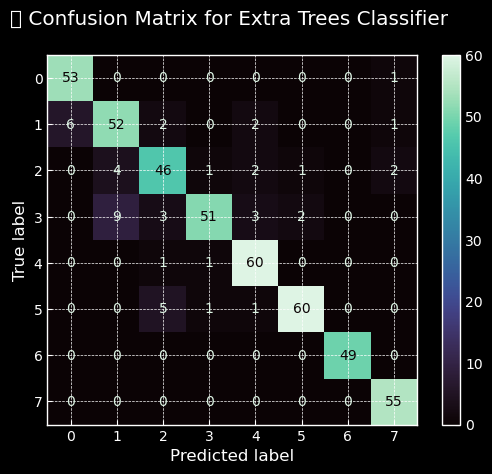

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


try:
    # Assuming Classifier is already trained
    Y_pred = Classifier.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Classifier.classes_)
    disp.plot(cmap='mako')
    
    plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
    plt.show()

except Exception as e:
    print(f"Error: {e}")


The confusion matrix above helps me understand how many times my model produced correct outputs and how many times it failed to provide accurate predictions, as indicated by the values in the black boxes.

# Saving the best Classification ML model

In [71]:
filename = "FinalModel_Classification_E03.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Classification_E03.pkl']

### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and regression label

In [72]:
X = df.drop('capacity_mw', axis=1)
Y = df['capacity_mw']

I have divided the dataset into features and the regression label, where 
𝑋
X denotes all the feature columns and 
𝑌
Y represents the regression target label column.

## Feature Scaling

In [73]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.154079,-0.911736,1.175163,0.468797,1.580000,-1.060641
1,0.598056,-0.567417,-0.983247,0.618009,3.127148,0.400570
2,0.132345,-1.920402,1.606845,0.618009,-0.514600,0.400570
3,0.452429,3.205575,-0.551565,-0.053442,-0.490798,0.400570
4,0.141538,1.283666,-0.983247,0.767220,-0.490798,0.400570


I am using the Standard Scaler method to normalize my feature values and ensure that my regression model does not have any kind of biasness towards a particular column value.

#### Finding the best random state for building Regression Models

In [74]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.5383340720045708 on Random State 135


In [75]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=135)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have developed a regression function that splits the training and testing features and labels, trains the model, predicts the label, calculates the RMSE score, generates the R² score, computes the cross-validation score, and finally determines the difference between the R² score and the cross-validation score.

In [76]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.2755006251261407
R2 Score is: 53.83340720045708
Cross Validation Score: 42.23177089747714
R2 Score - Cross Validation Score is 11.60163630297994


In [78]:
# Ridge Regression

model=Ridge(alpha=1e-2)
reg(model, X, Y)

RMSE Score is: 1.2755004660867078
R2 Score is: 53.83341871328293
Cross Validation Score: 42.23181610972734
R2 Score - Cross Validation Score is 11.601602603555591


In [79]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1.1644556142667204
R2 Score is: 61.5220123907195
Cross Validation Score: 47.63562285903829
R2 Score - Cross Validation Score is 13.88638953168121


In [80]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 1.307152803169806
R2 Score is: 51.51368380067365
Cross Validation Score: 39.722179789343535
R2 Score - Cross Validation Score is 11.791504011330112


In [81]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1.2250736210997564
R2 Score is: 57.41164659536977
Cross Validation Score: 45.97259639022776
R2 Score - Cross Validation Score is 11.43905020514201


In [82]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1.2228438588952355
R2 Score is: 57.56653603032515
Cross Validation Score: 45.93257010760943
R2 Score - Cross Validation Score is 11.633965922715724


In [83]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.5397653576772308
R2 Score is: 32.721614483796635
Cross Validation Score: 3.532518464709591
R2 Score - Cross Validation Score is 29.189096019087046


In [84]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.1131522779037217
R2 Score is: 64.83783310530653
Cross Validation Score: 55.637601015967334
R2 Score - Cross Validation Score is 9.200232089339195


In [85]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.0151440988431804
R2 Score is: 70.75700426401559
Cross Validation Score: 63.43844691240712
R2 Score - Cross Validation Score is 7.318557351608469


In [86]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 1.0644171549725359
R2 Score is: 67.84931703307467
Cross Validation Score: 57.84836539299694
R2 Score - Cross Validation Score is 10.00095164007773


### Hyper parameter tuning on the best Regression ML Model

In [90]:
# Choosing Extra Trees Regressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = ExtraTreesRegressor()


param_grid = {
    'n_estimators': [100, 200],  
    'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
    'max_depth': [None, 10, 20],
    
}

# Set up GridSearchCV
GSCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
GSCV.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['absolute_error', 'friedman_mse',
                                       'poisson', 'squared_error'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [91]:
GSCV.best_params_

{'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 100}

In [92]:
Final_Model = ExtraTreesRegressor(criterion='squared_error', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.63592075610242


### Saving the best Regression ML model

In [93]:
filename = "FinalModel_Regression_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Regression_E04.pkl']

# --THE END--